# Assignment 1 – ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:


1.   What are the data types? (Only numeric and categorical)

2.  Are there missing values?

3. What are the likely distributions of the numeric variables?

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

5. Which independent variables have missing data? How much?

6. Do the training and test sets have the same data?

7. In the predictor variables independent of all the other predictor variables?

8. Which predictor variables are the most important?

9. Do the ranges of the predictor variables make sense?

10. What are the distributions of the predictor variables?
11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?
12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.


# Abstract

310 Observations, 13 Attributes (12 Numeric Predictors, 1 Binary Class Attribute - No Demographics)

Numerous issues with any section of the intricate, interrelated network of spinal muscles, nerves, bones, discs, or tendons in the lumbar spine can result in lower back discomfort. The following are typical causes of low back pain:

*   The large nerve roots in the low back that go to the legs may be irritated
*   The smaller nerves that supply the low back may be irritated
*   The large paired lower back muscles (erector spinae) may be strained
*   The bones, ligaments or joints may be damaged
*   An intervertebral disc may be degenerating

Lower back pain, as well as pain that radiates or is referred to other parts of the body, can be brought on by an irritation or issue with any of these tissues. Back muscle spasms, which may not seem like much but can cause excruciating pain and incapacity, are a common side effect of lower back disorders. 

Although lower back pain is very prevalent, there is a wide range in its symptoms and intensity. Simple lower back muscle strains may be so painful as to require a trip to the ER, whereas a degenerating disc may only cause minor, sporadic discomfort.

Using information about the physical spine that has been gathered, this data set will determine whether a person is abnormal or normal.

**Data Set**

This data set is about to identify a person is abnormal or normal using collected physical spine details/data.

The data set consists of :
1.   Twelve numerical features leading to Spine problem
2.   Class attribute indicates if the person has a spine problem or not
3.   There are a total of 311 observations.


**Q What are the data types? (Only numeric and categorical)** 

Numeric data types include integers and floating-point numbers. These data types are used to represent numerical values, such as age, weight, or temperature.

Categorical data types include nominal and ordinal data. Nominal data is used to represent categories that have no inherent order or ranking, such as gender or eye color. Ordinal data is used to represent categories that have an inherent order or ranking, such as education level or income level.

In [2]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split

In [76]:
url = 'https://raw.githubusercontent.com/jainam240101/Data-Science-Assignments/main/Assignment%201/Dataset_spine.csv'
dataset = pd.read_csv(url, index_col=0)

In [77]:
dataset.head()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
Col1,,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [78]:
dataset.iloc[:,-1:].head()

,Unnamed: 13
Col1,
63.027817,NaN
39.056951,NaN
68.832021,Prediction is done by using binary classificat...
69.297008,NaN
49.712859,NaN


In [79]:
del dataset["Unnamed: 13"]

In [80]:
dataset.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [81]:
dataset.head()

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
Col1,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


**Q- Are there any missing values?**





In [82]:
dataset.isnull().sum()

pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data


**Q-Which independent variables have missing data? How much?**

In [83]:
for col in dataset.columns:
    print("Column:",col, "\n\n", dataset[col].value_counts(),"\n")

Column: pelvic_tilt 

 22.552586    1
14.377189    1
18.968430    1
16.964297    1
16.417462    1
            ..
13.469986    1
18.774071    1
30.361685    1
13.922286    1
5.073991     1
Name: pelvic_tilt, Length: 310, dtype: int64 

Column: lumbar_lordosis_angle 

 52.000000    4
42.000000    4
47.000000    4
35.000000    4
37.000000    3
            ..
67.900000    1
48.500000    1
86.960602    1
48.384057    1
36.641233    1
Name: lumbar_lordosis_angle, Length: 280, dtype: int64 

Column: sacral_slope 

 35.417055    3
56.309932    3
45.000000    3
33.111342    3
35.655328    2
            ..
55.388858    1
48.576334    1
50.477369    1
44.144903    1
28.767649    1
Name: sacral_slope, Length: 281, dtype: int64 

Column: pelvic_radius 

 98.672917     1
101.723334    1
125.846646    1
127.632875    1
94.882336     1
             ..
102.337524    1
114.787107    1
108.010218    1
115.514798    1
123.945244    1
Name: pelvic_radius, Length: 310, dtype: int64 

Column: degree_spondylo

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 310 entries, 63.0278175 to 33.84164075
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_tilt               310 non-null    float64
 1   lumbar_lordosis_angle     310 non-null    float64
 2   sacral_slope              310 non-null    float64
 3   pelvic_radius             310 non-null    float64
 4   degree_spondylolisthesis  310 non-null    float64
 5   pelvic_slope              310 non-null    float64
 6   direct_tilt               310 non-null    float64
 7   thoracic_slope            310 non-null    float64
 8   cervical_tilt             310 non-null    float64
 9   sacrum_angle              310 non-null    float64
 10  scoliosis_slope           310 non-null    float64
 11  class                     310 non-null    object 
dtypes: float64(11), object(1)
memory usage: 31.5+ KB


**Q3 - What are the likely distributions of the numeric variables?**

In [85]:
dataset.describe()

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [86]:
categorical_features= dataset.describe(include=['object'])
categorical_features

,class
count,310
unique,2
top,Abnormal
freq,210


           pelvic_tilt  lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
Col1                                                                         
63.027817    22.552586              39.609117     40.475232      98.672917   
39.056951    10.060991              25.015378     28.995960     114.405425   
68.832021    22.218482              50.092194     46.613539     105.985135   
69.297008    24.652878              44.311238     44.644130     101.868495   
49.712859     9.652075              28.317406     40.060784     108.168725   
...                ...                    ...           ...            ...   
47.903565    13.616688              36.000000     34.286877     117.449062   
53.936748    20.721496              29.220534     33.215251     114.365845   
61.446597    22.694968              46.170347     38.751628     125.670725   
45.252792     8.693157              41.583126     36.559635     118.545842   
33.841641     5.073991              36.641233     28.767649     

<Figure size 576x360 with 0 Axes>

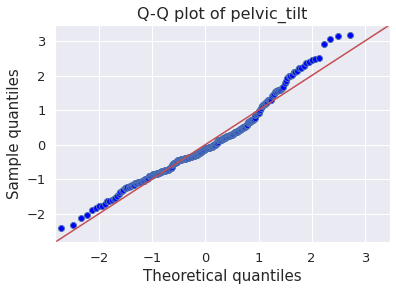

lumbar_lordosis_angle


<Figure size 576x360 with 0 Axes>

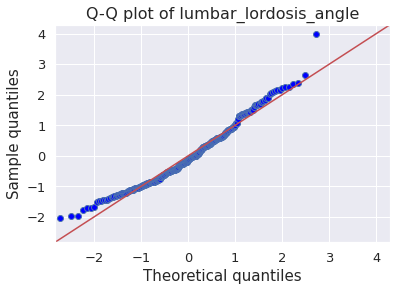

sacral_slope


<Figure size 576x360 with 0 Axes>

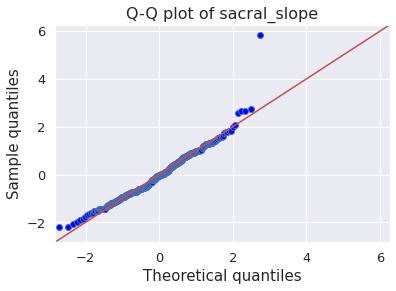

pelvic_radius


<Figure size 576x360 with 0 Axes>

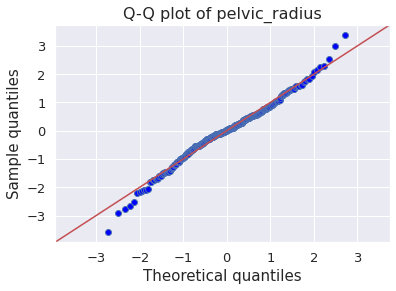

degree_spondylolisthesis


<Figure size 576x360 with 0 Axes>

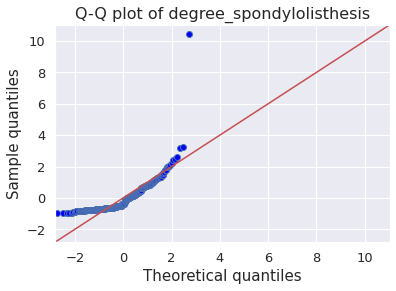

pelvic_slope


<Figure size 576x360 with 0 Axes>

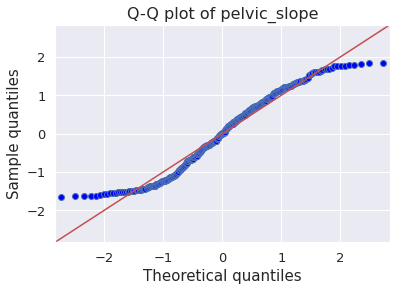

direct_tilt


<Figure size 576x360 with 0 Axes>

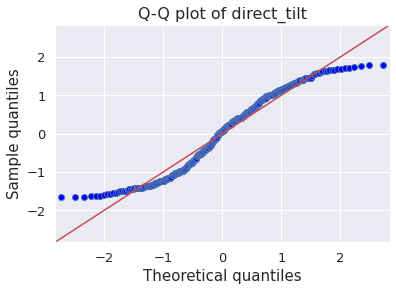

thoracic_slope


<Figure size 576x360 with 0 Axes>

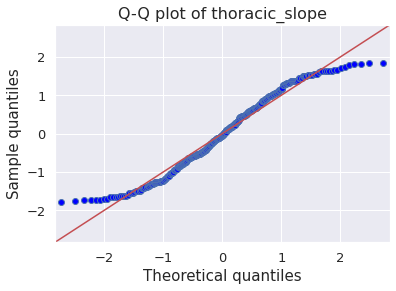

cervical_tilt


<Figure size 576x360 with 0 Axes>

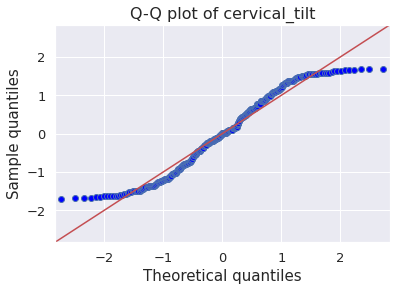

sacrum_angle


<Figure size 576x360 with 0 Axes>

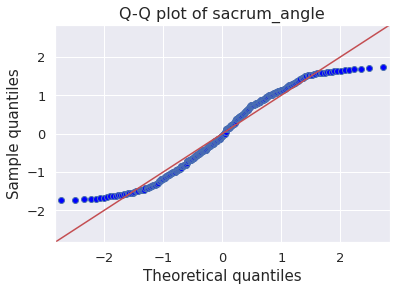

scoliosis_slope


<Figure size 576x360 with 0 Axes>

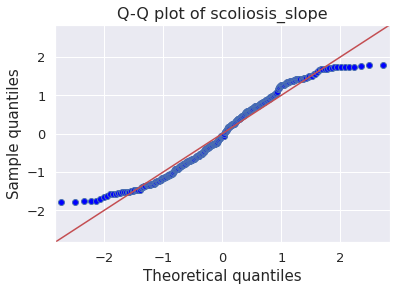

In [89]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=dataset[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']]
print(data_norm)
for c in data_norm.columns[:]:
    print(c)
    plt.figure(figsize=(8,5))
    fig=qqplot(data_norm[c],line='45',fit='True')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles",fontsize=15)
    plt.ylabel("Sample quantiles",fontsize=15)
    plt.title("Q-Q plot of {}".format(c),fontsize=16)
    plt.grid(True)
    plt.show()

In [88]:
dataset

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
Col1,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal


In [90]:
dataset["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

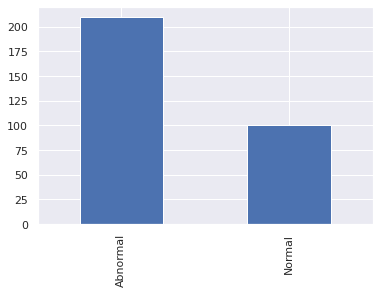

In [92]:
dataset["class"].value_counts().sort_index().plot.bar()

In [93]:
dataset.groupby('class').mean()

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
class,,,,,,,,,,,
Abnormal,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528712,26.694019


**Q - Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

**We will use 3 methods-**
1. Correlation Analysis

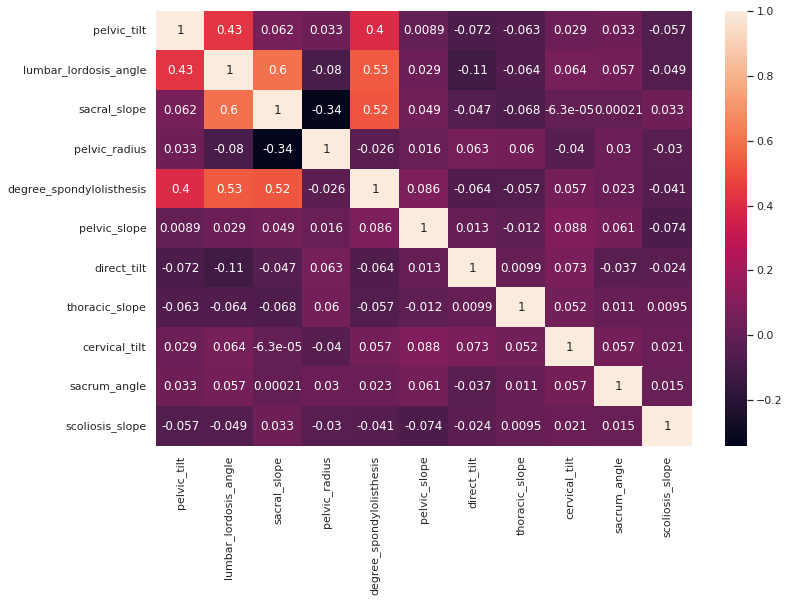

In [94]:
corr = dataset.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True)


2. Subplotting X variables against the Y to check the relation

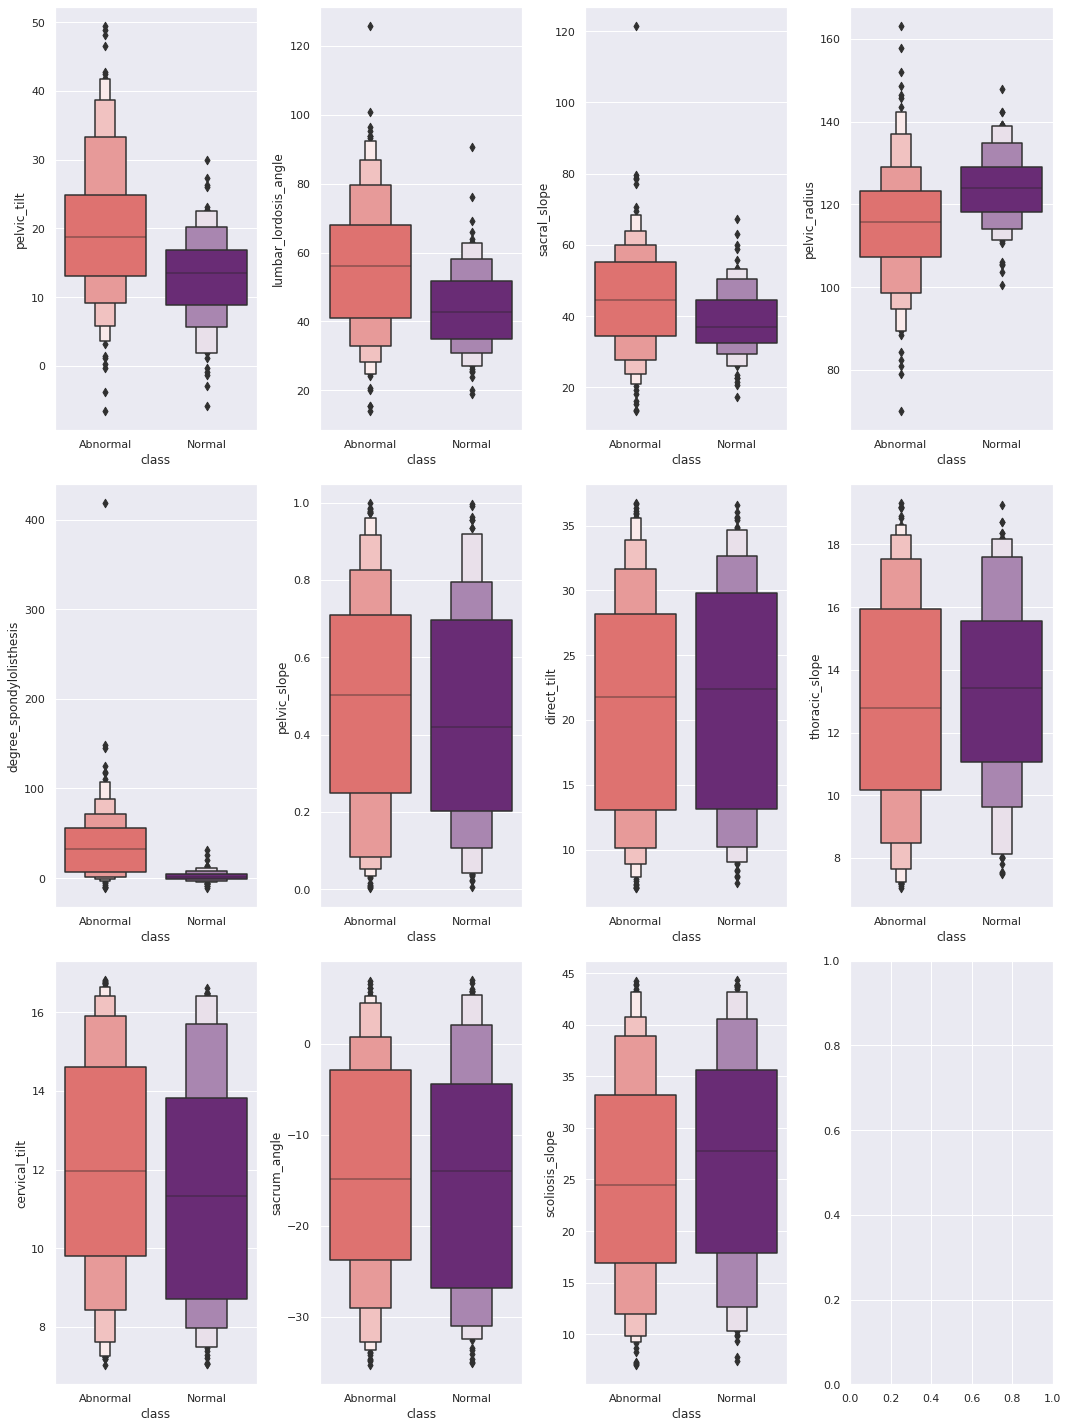

In [95]:
fig, axes = plt.subplots(3, 4, figsize = (15,20))
axes = axes.flatten()

for i in range(0,len(dataset.columns)-1):
    sns.boxenplot(x="class", y=dataset.iloc[:,i], data=dataset, orient='v', ax=axes[i],palette="magma_r")

plt.tight_layout()
plt.show()


In [96]:
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        if abs(corr.iloc[i, j]) > 0.8:
            print(f"Predictor variables {corr.columns[i]} and {corr.columns[j]} are highly correlated.")

So we can observe here that Pelvic Incidence and Sacral Slope are highly are higly correlated as the predictor variables have a correlation value greater than 0.8 so predictor variables are 
dependent of all the other predictor variables

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
predictors = ['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']
X = dataset[predictors].values

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
for idx, val in enumerate(vif):
    print(f"VIF for {predictors[idx]}: {val}")

VIF for pelvic_tilt: 5.842415976978515
VIF for lumbar_lordosis_angle: 19.372434331390146
VIF for sacral_slope: 19.860515397919542
VIF for pelvic_radius: 34.36156010422566
VIF for degree_spondylolisthesis: 2.4348251631835693
VIF for pelvic_slope: 3.8117359143301393
VIF for direct_tilt: 7.223879846009522
VIF for thoracic_slope: 15.037919705594375
VIF for cervical_tilt: 16.777653169234224
VIF for sacrum_angle: 2.3172061384407523
VIF for scoliosis_slope: 6.955541793792665


A VIF of 1 indicates that there is no multicollinearity between the predictor variable and the other predictor variables in the model. A VIF greater than 1 indicates that the predictor variable is correlated with one or more other predictor variables in the model.

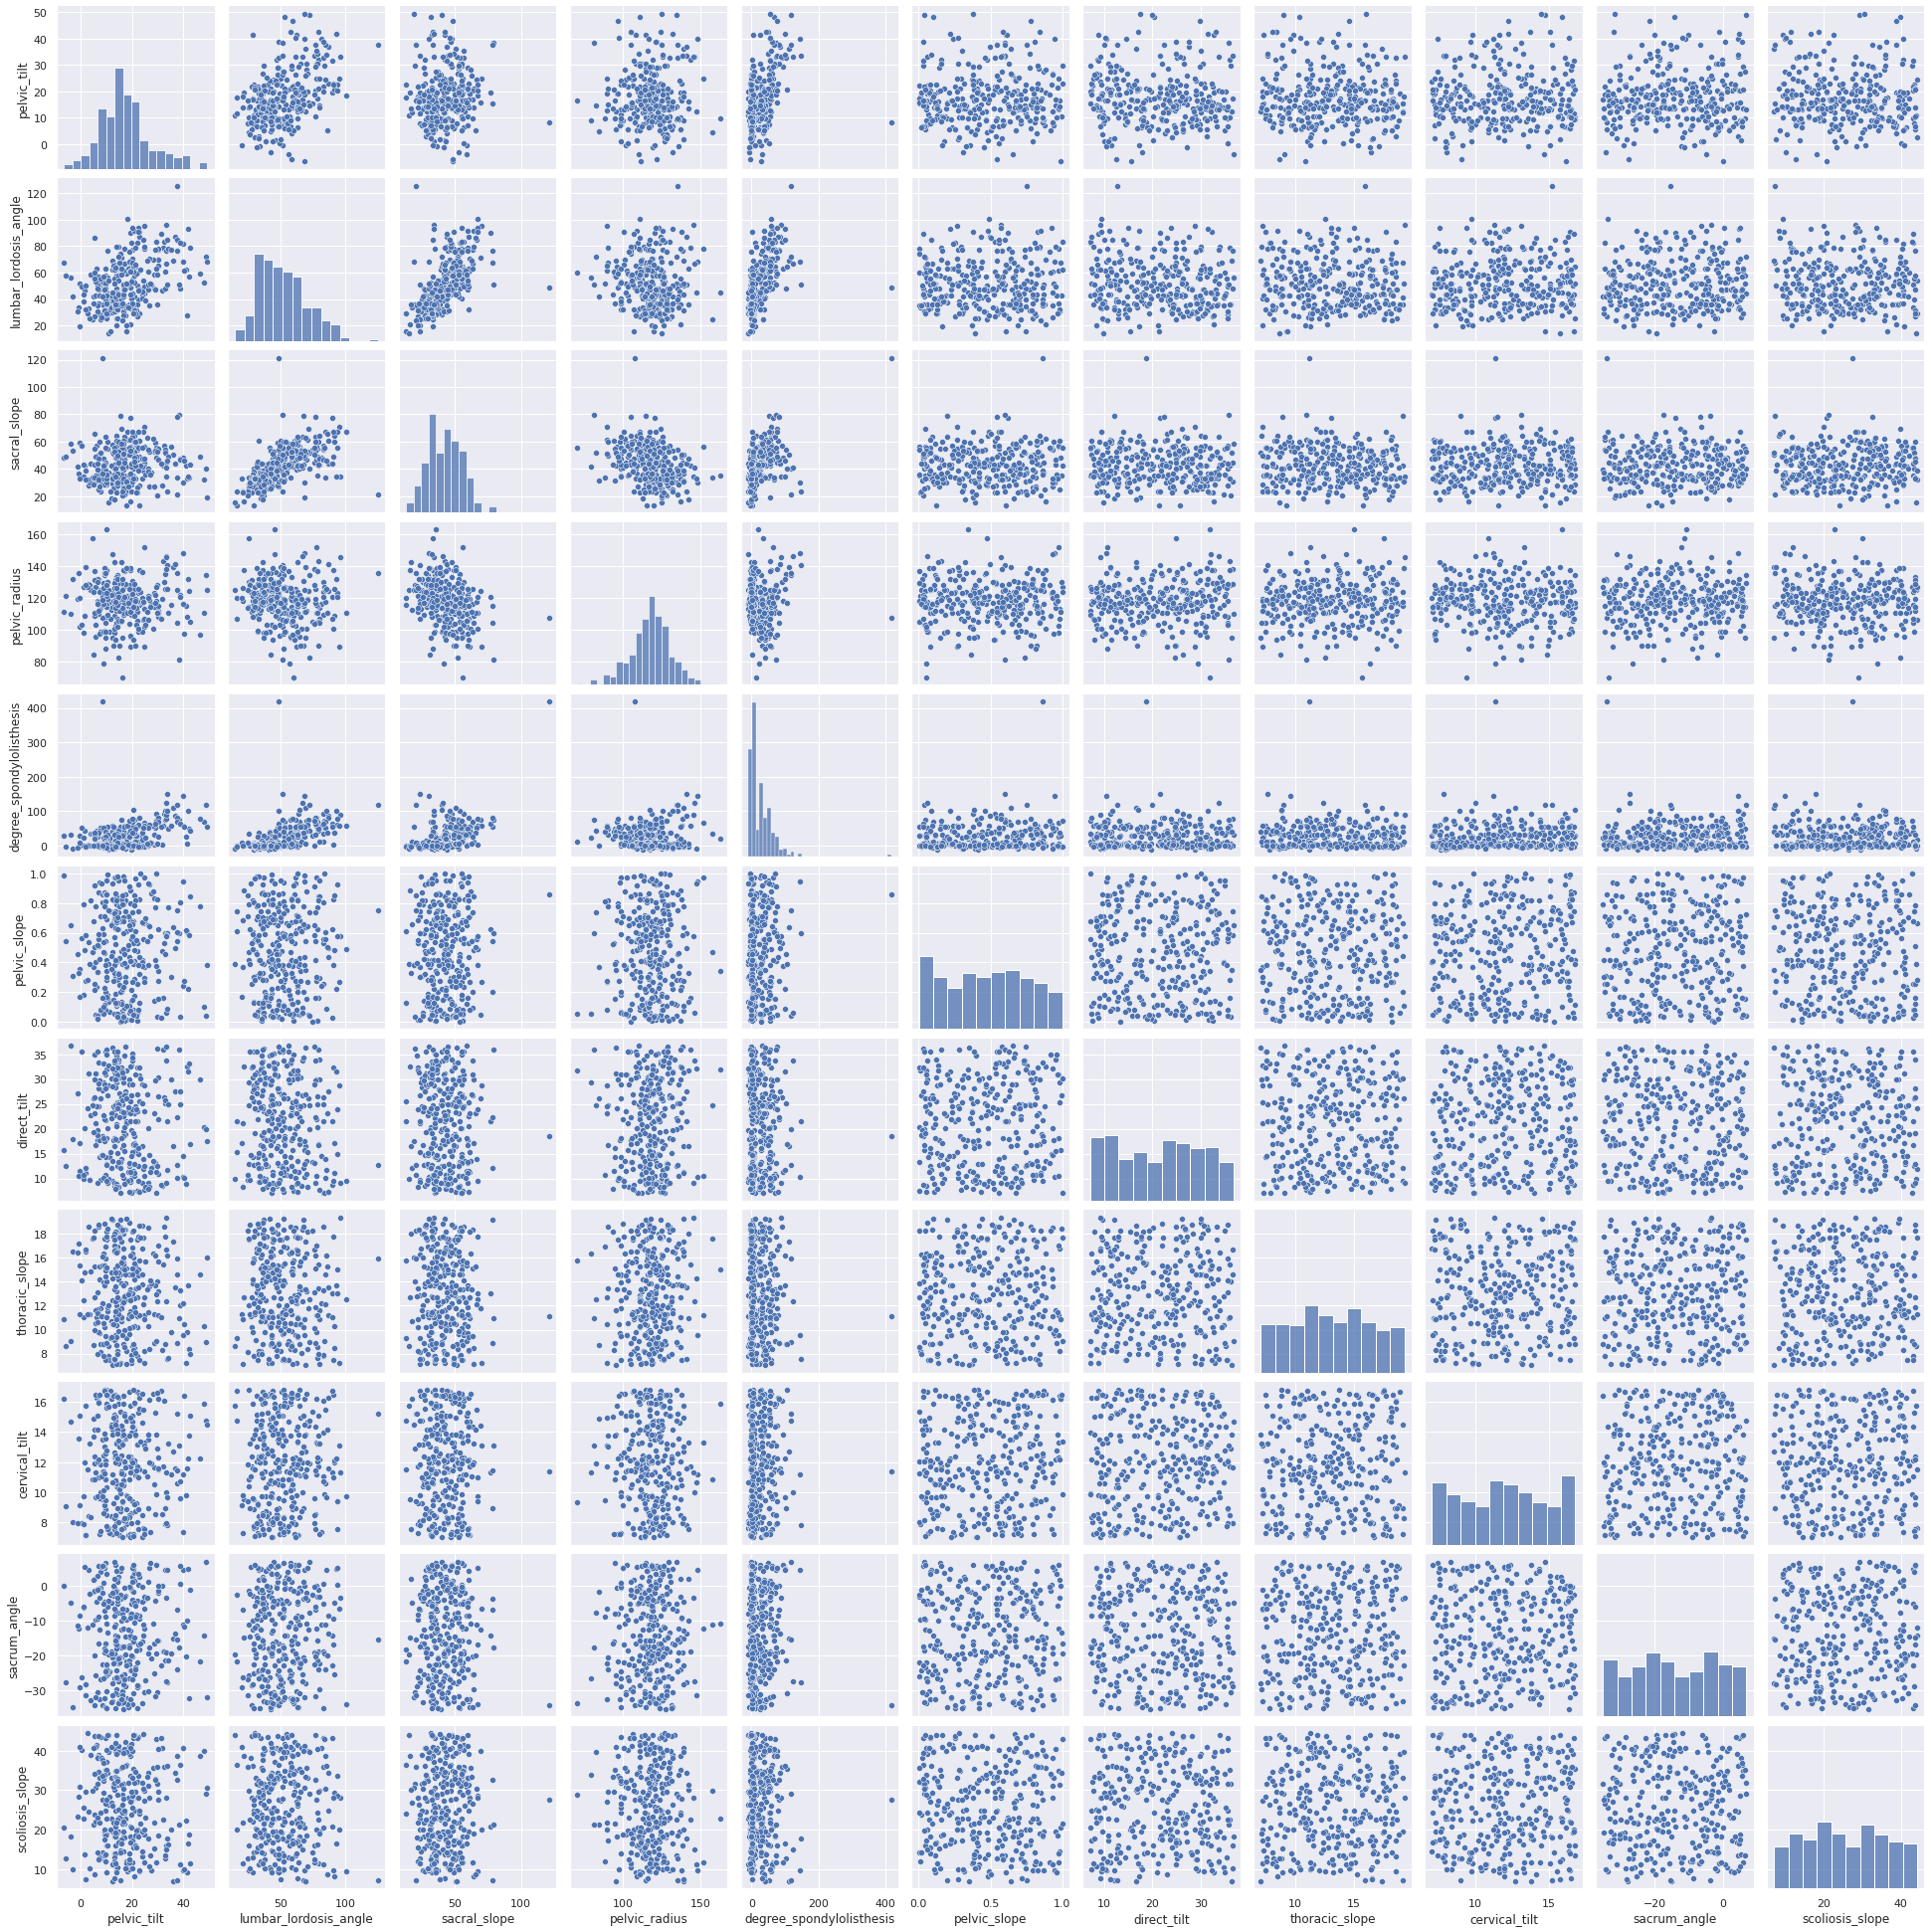

In [100]:
sns.pairplot(dataset) 

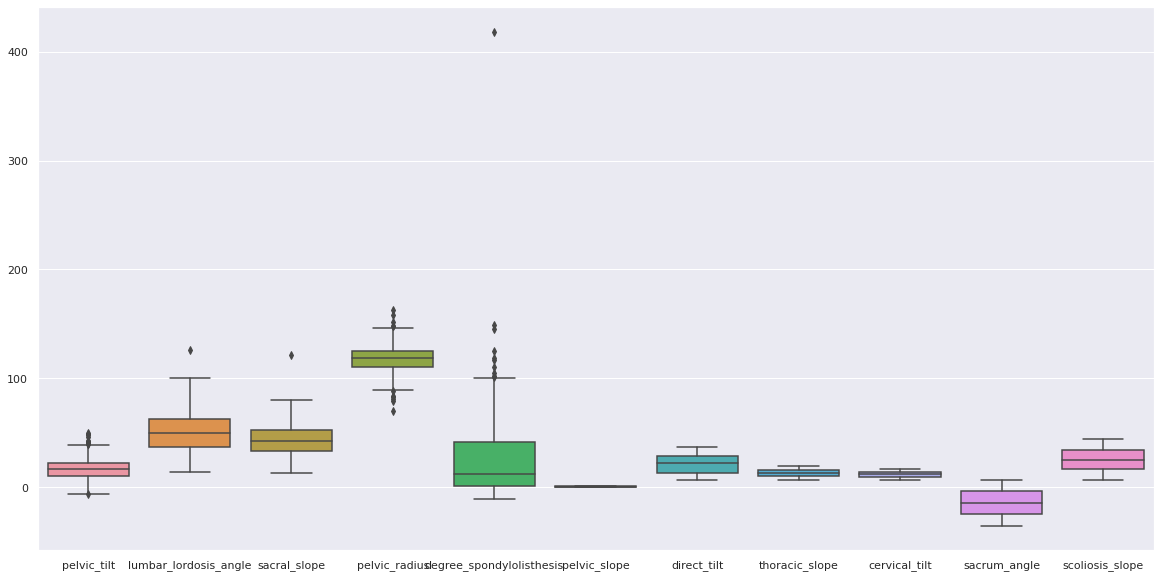

In [101]:
plt.figure(figsize=(20,10))
sns.boxplot(data=dataset)

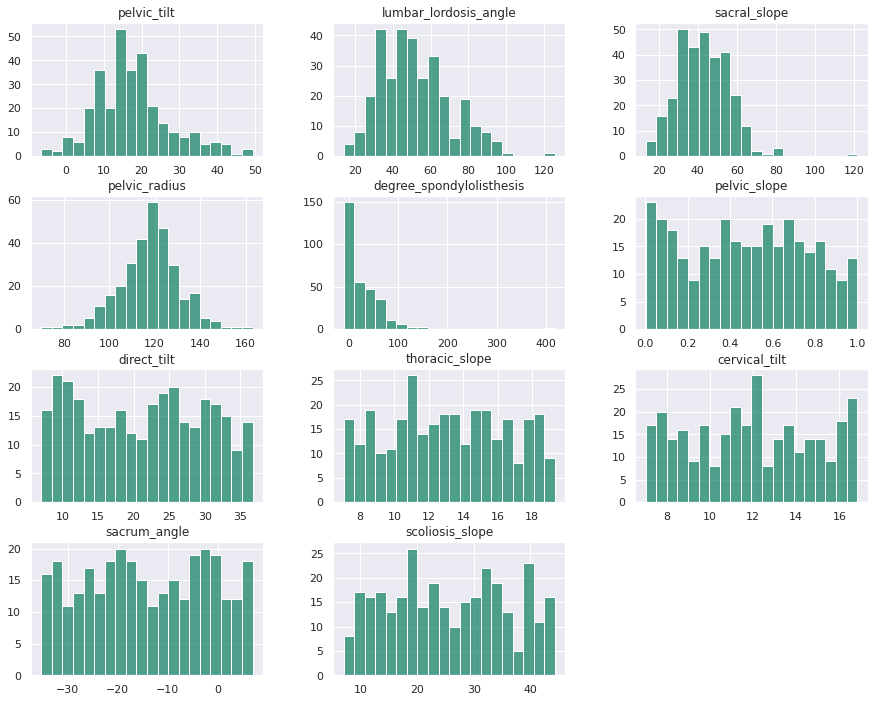

In [102]:
dataset.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

In [103]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [104]:
X = dataset.iloc[:, :-1]
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

pelvic_tilt Contains Outlier
lumbar_lordosis_angle Contains Outlier
sacral_slope Contains Outlier
pelvic_radius Contains Outlier
degree_spondylolisthesis Contains Outlier


In [105]:
def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [106]:
for i in range (3):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

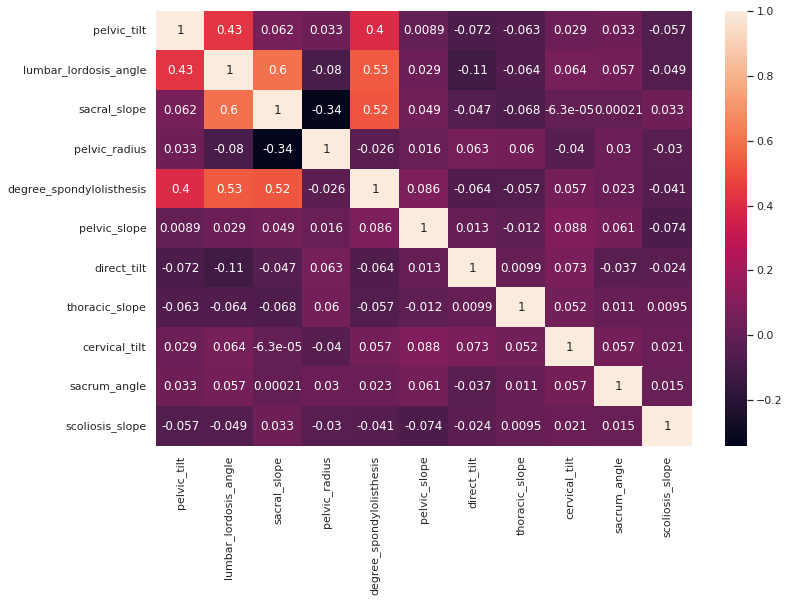

In [107]:
corr = dataset.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True)


After removing outliers we compare the correlation matrix and it is same so we see that removing outliers is not gonna make a difference  

In [108]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.684601,0.295226,0.408699,0.099877,0.108734,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797
1,0.349535,0.126987,0.235632,0.415357,0.157231,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812
2,0.675639,0.416076,0.501244,0.246507,0.075764,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166
3,0.740938,0.349432,0.471552,0.163957,0.224132,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741
4,0.338566,0.165053,0.402451,0.290294,0.190990,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711


In [109]:
from scipy.stats import skew
features_index = X.dtypes[X.dtypes != 'object'].index

skew_features = X[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features> 0]
print(skew_features_top.sort_values(ascending=False))

degree_spondylolisthesis    0.863313
lumbar_lordosis_angle       0.465611
sacral_slope                0.228751
pelvic_tilt                 0.200448
scoliosis_slope             0.063905
thoracic_slope              0.022934
pelvic_slope                0.016152
cervical_tilt               0.014944
direct_tilt                 0.010743
dtype: float64


As we are splitting the data with 80% as training and 20% as testing so there is no similar data in training data and testing data 

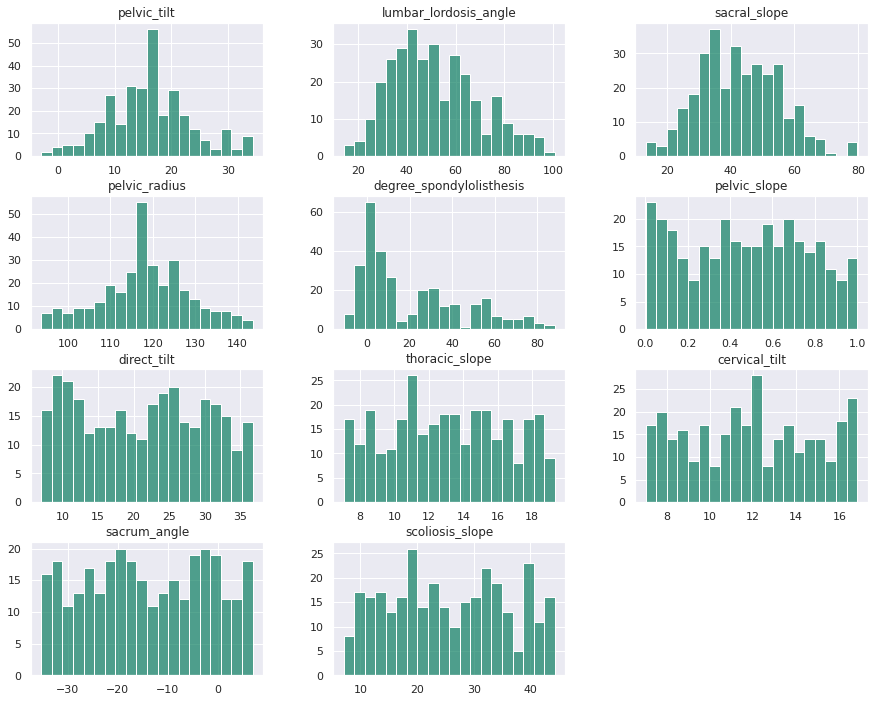

In [110]:
X.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

In [111]:
label = dataset["class"]
encoder = LabelEncoder()

label = encoder.fit_transform(label)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Q- Do the training and test sets have the same data?**

In [112]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [113]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**Q- Which predictor variables are the most important?**

In [114]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

degree_spondylolisthesis    0.300503
pelvic_radius               0.135644
lumbar_lordosis_angle       0.106772
sacral_slope                0.097356
pelvic_tilt                 0.077714
sacrum_angle                0.053182
thoracic_slope              0.049092
scoliosis_slope             0.048323
cervical_tilt               0.047983
pelvic_slope                0.041914
direct_tilt                 0.041516
dtype: float64

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

log_rg = LogisticRegression().fit(X_train, y_train)
cross_val_score(log_rg, X_train, y_train, cv=5)
print(log_rg.score(X_test, y_test))
print(classification_report(y_test, log_rg.predict(X_test)))

feature_importance_lr = pd.DataFrame(zip(X.columns.values, log_rg.coef_.ravel()))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending=False, inplace=True)

0.8387096774193549
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        42
           1       0.92      0.55      0.69        20

    accuracy                           0.84        62
   macro avg       0.87      0.76      0.79        62
weighted avg       0.85      0.84      0.83        62



In [116]:
from sklearn.metrics import mean_squared_error

def print_accuracy(accuracy_score, score_text=False):
    clean_accuracy = accuracy_score*100.0
    if score_text:
        clean_text = score_text.strip() + ' '
        print('{}{:.2f}%'.format(clean_text, clean_accuracy))
    else:
        print('{:.2f}%'.format(clean_accuracy))

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test ,pred)
    rmse = np.sqrt(mse)
    print('{0} MSE : {1}'.format(model.__class__.__name__,np.round(mse, 2)))
    print('{0} RMSE : {1}'.format(model.__class__.__name__,np.round(rmse, 2)))
    return mse, rmse

In [117]:
!pip install category-encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import category_encoders as ce
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

,pelvic_tilt_1,pelvic_tilt_2,pelvic_tilt_3,pelvic_tilt_4,pelvic_tilt_5,pelvic_tilt_6,pelvic_tilt_7,pelvic_tilt_8,pelvic_tilt_9,pelvic_tilt_10,...,scoliosis_slope_239,scoliosis_slope_240,scoliosis_slope_241,scoliosis_slope_242,scoliosis_slope_243,scoliosis_slope_244,scoliosis_slope_245,scoliosis_slope_246,scoliosis_slope_247,scoliosis_slope_248
157,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state = 1000).fit(X_train, y_train)


tree_pred = tree_model.predict(X_test)
print_accuracy(accuracy_score(y_test, tree_pred), 'Decision tree accuracy:')

Decision tree accuracy: 67.74%


In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [i for i in range(1, 11)], 
              'max_features': [i for i in range(1, 8)], 
              'min_samples_leaf': [i for i in range(1, 11)]}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state = 1000), param_grid=param_grid, cv=10, return_train_score = True, n_jobs=-1)

In [122]:
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1000),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [123]:
print("Best Score: {}%".format(round(dt_grid.best_score_*100.0, 2)))
print("Best params: {}".format(dt_grid.best_params_))

Best Score: 67.73%
Best params: {'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 1}


In [124]:
y_pred = dt_grid.best_estimator_.predict(X_test)
print_accuracy(accuracy_score(y_test,y_pred), 'Decision Tree Classifier:')

Decision Tree Classifier: 67.74%


In [125]:
get_rmse(tree_model)
print('')
get_rmse(dt_grid)

DecisionTreeClassifier MSE : 0.32
DecisionTreeClassifier RMSE : 0.57

GridSearchCV MSE : 0.32
GridSearchCV RMSE : 0.57


(0.3225806451612903, 0.5679618342470648)

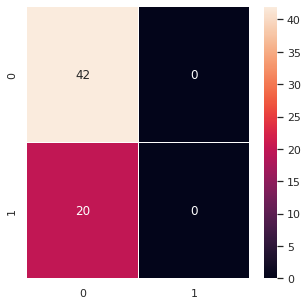

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        42
           1       0.00      0.00      0.00        20

    accuracy                           0.68        62
   macro avg       0.34      0.50      0.40        62
weighted avg       0.46      0.68      0.55        62



In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

cm = confusion_matrix(y_test,dt_grid.predict(X_test))

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=.3)
plt.show()

print(classification_report(y_test,dt_grid.predict(X_test)))

In [127]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print_accuracy(accuracy_score(y_test, rf.predict(X_test)), 'RF accuracy:')

RF accuracy: 67.74%


In [128]:
l = ["gini","entropy"]

grid = {"criterion":l,
        "n_estimators":range(1,20), 
        'max_depth' : [6,8,10,12],
        'min_samples_leaf':[2,4,6,8]}


rf_cv = GridSearchCV(estimator = rf , param_grid = grid , cv = 5, n_jobs=-1)
rf_cv.fit(X_train,y_train)

print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 1}
0.6773877551020409


In [129]:
y_pred = rf_cv.predict(X_test)
print_accuracy(accuracy_score(y_test,y_pred), "RF accuracy : ")

RF accuracy : 67.74%


In [130]:
get_rmse(rf_cv)

GridSearchCV MSE : 0.32
GridSearchCV RMSE : 0.57


(0.3225806451612903, 0.5679618342470648)

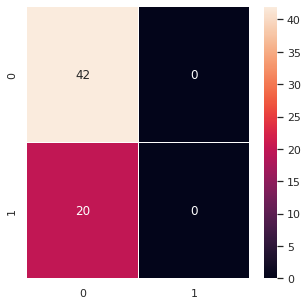

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        42
           1       0.00      0.00      0.00        20

    accuracy                           0.68        62
   macro avg       0.34      0.50      0.40        62
weighted avg       0.46      0.68      0.55        62



In [131]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=.3)
plt.show()

print(classification_report(y_test,y_pred))

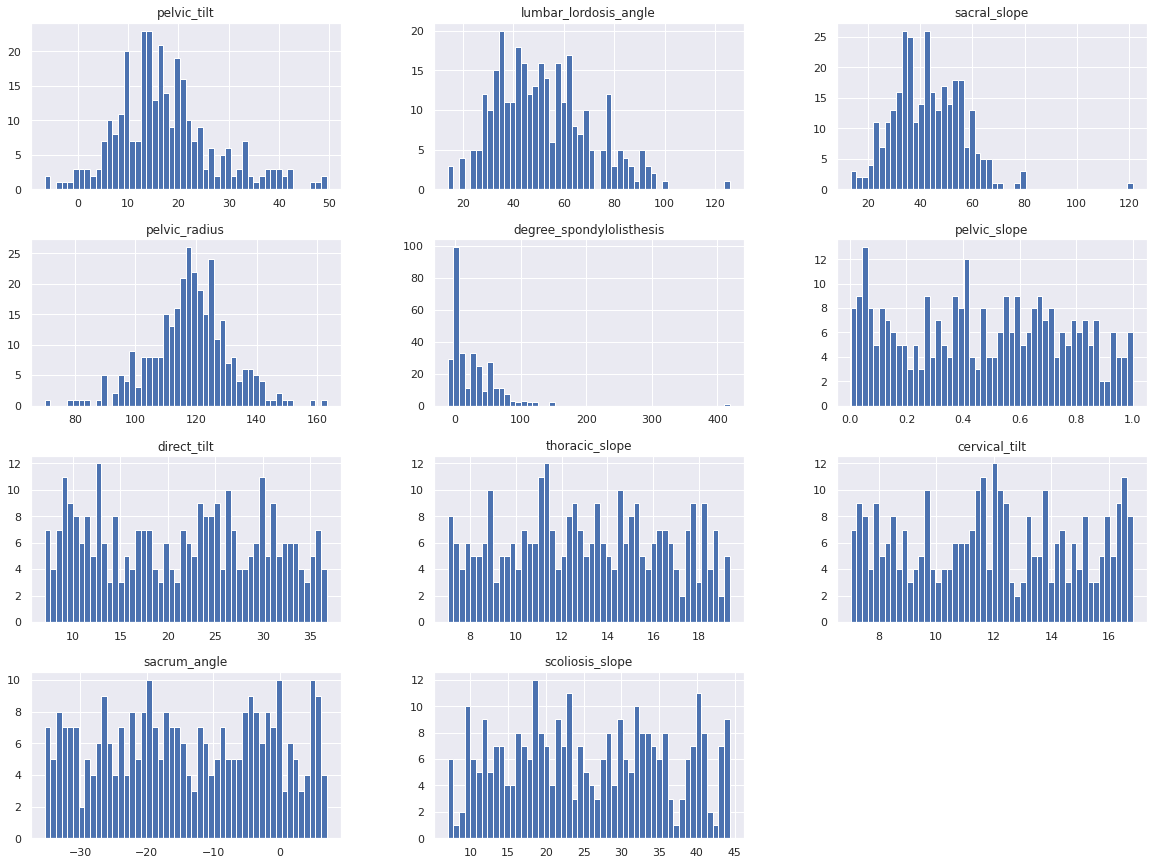

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(dataset[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])

dataset[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']].hist(bins=50, figsize=(20,15))
plt.show()



**Q - Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

**Our idea:**
____________

The code splits the data into predictor variables and target variable, removes a percentage of the data randomly, imputes the missing values using three imputation methods (mean, KNN, and iterative), fits a linear regression model to the complete data, and makes predictions on the missing values using the three imputed datasets. Finally, it calculates the mean absolute error (MAE) and mean squared error (MSE) for each imputation method, which can be used to compare the performance of the model on the three imputed datasets.

In [135]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
string_columns = dataset[['class']]

encoded_columns = string_columns.apply(encoder.fit_transform)

# Replace the original columns with the encoded columns
dataset[['class']] = encoded_columns

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

df = dataset

X = df[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']]
y = df['class']

percentage = 0.01
missing_rows = np.random.choice(df.index, int(df.shape[0] * percentage), replace=False)
df_missing = df.loc[missing_rows]
df = df.drop(missing_rows)

mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer()
iter_imputer = IterativeImputer()

X_mean = mean_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])
X_knn = knn_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])
X_iter = iter_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)
y_pred_mean = model.predict(X_mean)
y_pred_knn = model.predict(X_knn)
y_pred_iter = model.predict(X_iter)

mae_mean = mean_absolute_error(df_missing['class'], y_pred_mean)
mse_mean = mean_squared_error(df_missing['class'], y_pred_mean)
mae_knn = mean_absolute_error(df_missing['class'], y_pred_knn)
mse_knn = mean_squared_error(df_missing['class'], y_pred_knn)
mae_iter = mean_absolute_error(df_missing['class'], y_pred_iter)
mse_iter = mean_squared_error(df_missing['class'], y_pred_iter)

print(f'Mean Imputation: MAE = {mae_mean}, MSE = {mse_mean}')
print(f'KNN Imput : MAE = {mae_knn}, MSE = {mse_knn}')


def calc_bias_variance(y, y_pred):
  y_mean = np.mean(y)
  bias = np.mean((y_mean - y_pred)**2)
  variance = np.mean((y_pred - y_mean)**2)
  return bias, variance

bias_mean, variance_mean = calc_bias_variance(df_missing['class'], y_pred_mean)
bias_knn, variance_knn = calc_bias_variance(df_missing['class'], y_pred_knn)
bias_iter, variance_iter = calc_bias_variance(df_missing['class'], y_pred_iter)

print(f'Mean Imputation: Bias = {bias_mean}, Variance = {variance_mean}')
print(f'KNN Imput : Bias = {bias_knn}, Variance = {variance_knn}')
print(f'Iterative Imputation: Bias = {bias_iter}, Variance = {variance_iter}')



Mean Imputation: MAE = 0.45098980517141163, MSE = 0.24148035107913024
KNN Imput : MAE = 0.45098980517141163, MSE = 0.24148035107913024
Mean Imputation: Bias = 0.124034129250993, Variance = 0.124034129250993
KNN Imput : Bias = 0.124034129250993, Variance = 0.124034129250993
Iterative Imputation: Bias = 0.124034129250993, Variance = 0.124034129250993


In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

df = dataset

X = df[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']]
y = df['class']

percentage = 0.05
missing_rows = np.random.choice(df.index, int(df.shape[0] * percentage), replace=False)
df_missing = df.loc[missing_rows]
df = df.drop(missing_rows)

mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer()
iter_imputer = IterativeImputer()

X_mean = mean_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])
X_knn = knn_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])
X_iter = iter_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)
y_pred_mean = model.predict(X_mean)
y_pred_knn = model.predict(X_knn)
y_pred_iter = model.predict(X_iter)

mae_mean = mean_absolute_error(df_missing['class'], y_pred_mean)
mse_mean = mean_squared_error(df_missing['class'], y_pred_mean)
mae_knn = mean_absolute_error(df_missing['class'], y_pred_knn)
mse_knn = mean_squared_error(df_missing['class'], y_pred_knn)
mae_iter = mean_absolute_error(df_missing['class'], y_pred_iter)
mse_iter = mean_squared_error(df_missing['class'], y_pred_iter)

print(f'Mean Imputation: MAE = {mae_mean}, MSE = {mse_mean}')
print(f'KNN Imput : MAE = {mae_knn}, MSE = {mse_knn}')


def calc_bias_variance(y, y_pred):
  y_mean = np.mean(y)
  bias = np.mean((y_mean - y_pred)**2)
  variance = np.mean((y_pred - y_mean)**2)
  return bias, variance

bias_mean, variance_mean = calc_bias_variance(df_missing['class'], y_pred_mean)
bias_knn, variance_knn = calc_bias_variance(df_missing['class'], y_pred_knn)
bias_iter, variance_iter = calc_bias_variance(df_missing['class'], y_pred_iter)

print(f'Mean Imputation: Bias = {bias_mean}, Variance = {variance_mean}')
print(f'KNN Imput : Bias = {bias_knn}, Variance = {variance_knn}')
print(f'Iterative Imputation: Bias = {bias_iter}, Variance = {variance_iter}')



Mean Imputation: MAE = 0.292767790143551, MSE = 0.11331688123708514
KNN Imput : MAE = 0.292767790143551, MSE = 0.11331688123708514
Mean Imputation: Bias = 0.12168420093841147, Variance = 0.12168420093841147
KNN Imput : Bias = 0.12168420093841147, Variance = 0.12168420093841147
Iterative Imputation: Bias = 0.12168420093841147, Variance = 0.12168420093841147


In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

df = dataset

X = df[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']]
y = df['class']

percentage = 0.1
missing_rows = np.random.choice(df.index, int(df.shape[0] * percentage), replace=False)
df_missing = df.loc[missing_rows]
df = df.drop(missing_rows)

mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer()
iter_imputer = IterativeImputer()

X_mean = mean_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])
X_knn = knn_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])
X_iter = iter_imputer.fit_transform(df_missing[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']])

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)
y_pred_mean = model.predict(X_mean)
y_pred_knn = model.predict(X_knn)
y_pred_iter = model.predict(X_iter)

mae_mean = mean_absolute_error(df_missing['class'], y_pred_mean)
mse_mean = mean_squared_error(df_missing['class'], y_pred_mean)
mae_knn = mean_absolute_error(df_missing['class'], y_pred_knn)
mse_knn = mean_squared_error(df_missing['class'], y_pred_knn)
mae_iter = mean_absolute_error(df_missing['class'], y_pred_iter)
mse_iter = mean_squared_error(df_missing['class'], y_pred_iter)

print(f'Mean Imputation: MAE = {mae_mean}, MSE = {mse_mean}')
print(f'KNN Imput : MAE = {mae_knn}, MSE = {mse_knn}')


def calc_bias_variance(y, y_pred):
  y_mean = np.mean(y)
  bias = np.mean((y_mean - y_pred)**2)
  variance = np.mean((y_pred - y_mean)**2)
  return bias, variance

bias_mean, variance_mean = calc_bias_variance(df_missing['class'], y_pred_mean)
bias_knn, variance_knn = calc_bias_variance(df_missing['class'], y_pred_knn)
bias_iter, variance_iter = calc_bias_variance(df_missing['class'], y_pred_iter)

print(f'Mean Imputation: Bias = {bias_mean}, Variance = {variance_mean}')
print(f'KNN Imput : Bias = {bias_knn}, Variance = {variance_knn}')
print(f'Iterative Imputation: Bias = {bias_iter}, Variance = {variance_iter}')



Mean Imputation: MAE = 0.34858748081968893, MSE = 0.15350904485915548
KNN Imput : MAE = 0.34858748081968893, MSE = 0.15350904485915548
Mean Imputation: Bias = 0.03937205008942084, Variance = 0.03937205008942084
KNN Imput : Bias = 0.03937205008942084, Variance = 0.03937205008942084
Iterative Imputation: Bias = 0.03937205008942084, Variance = 0.03937205008942084


**Q - Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

df = dataset
df_np = df.apply(pd.to_numeric, errors='coerce')
df_np.dropna(inplace=True)

X = df[['pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']]
y = df['class']

z = np.abs(stats.zscore(X))
df_without_outliers = df[(z < 3).all(axis=1)]

df_with_outliers = df[(z >= 3).any(axis=1)]

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)

model_with_outliers = LinearRegression()
model_with_outliers.fit(X, y)
y_pred_with_outliers = model_with_outliers.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse_with_outliers = mean_squared_error(y, y_pred_with_outliers)
mae_with_outliers = mean_absolute_error(y, y_pred_with_outliers)

print(f'Without Outliers: MAE = {mae}, MSE = {mse}')
print(f'With Outliers: MAE = {mae_with_outliers}, MSE = {mse_with_outliers}')

Without Outliers: MAE = 0.33053717226850504, MSE = 0.1427804945902502
With Outliers: MAE = 0.33053717226850504, MSE = 0.1427804945902502


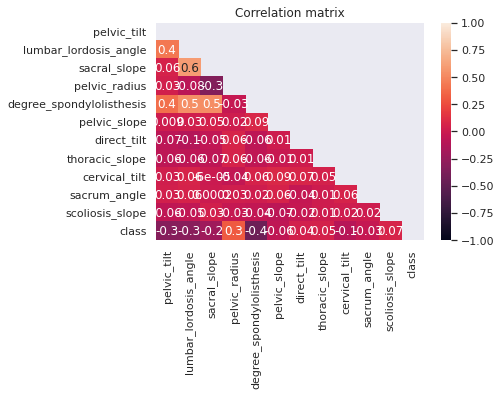

In [140]:
corr = dataset.corr()
matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix')
plt.show()

# References 



*   https://www.kaggle.com/code/debmalyaray/lower-backpain-symptoms-debmalya-ray
*   https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45
*   https://medium.com/coinmonks/a-practical-guide-to-data-cleaning-for-beginners-bd4f45967825
*   https://www.askpython.com/python/examples/rmse-root-mean-square-error
*   https://matplotlib.org/stable/users/index.html





